In [1]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import scipy.io
import numpy as np

# Ruta del archivo .mat
mat_file_path = 'c:/Users/Adrian/Downloads/trainSet/FIXATIONLOCS/Action/001.mat'

# Cargamos el archivo .mat
mat_data = scipy.io.loadmat(mat_file_path)

# Imprimimos las claves disponibles en el archivo para entender qué contiene
print(mat_data.keys())

# Supongamos que el archivo contiene una matriz con coordenadas de fijación bajo la clave 'fixations'
# Accedemos a la matriz de fijaciones usando la clave 'fixLocs'
fixations = mat_data.get('fixLocs')

# Imprimimos la forma de la matriz y algunas filas de ejemplo para explorar el contenido
print(f"Forma de la matriz de fijaciones: {fixations.shape}")
print(f"Ejemplo de las primeras filas de coordenadas de fijación:\n{fixations[:5]}")



dict_keys(['__header__', '__version__', '__globals__', 'fixLocs'])
Forma de la matriz de fijaciones: (1080, 1920)
Ejemplo de las primeras filas de coordenadas de fijación:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


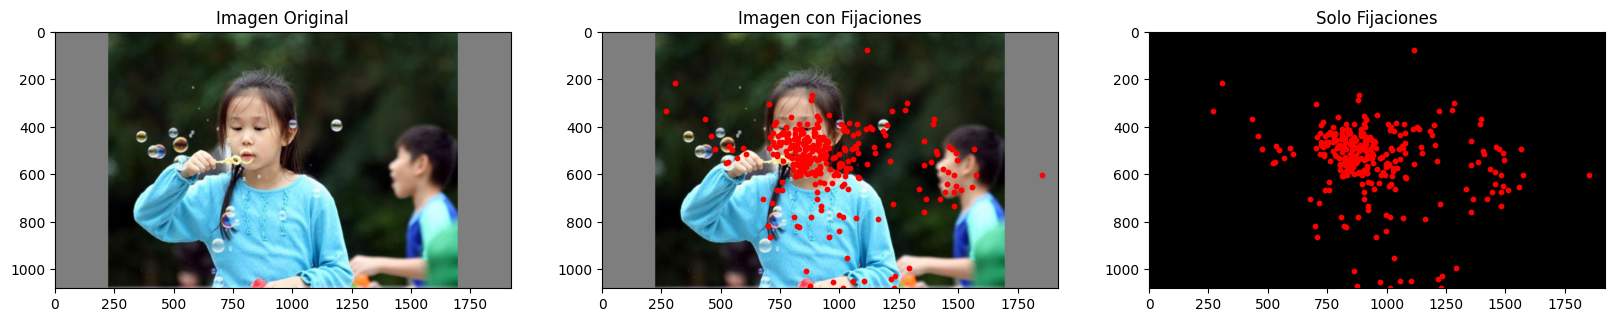

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Ruta de la imagen original (correspondiente al archivo de fijaciones)
image_path = 'C:/Users/Adrian/Downloads/trainSet/Stimuli/Action/001.jpg'

# Cargamos la imagen con OpenCV
image = cv2.imread(image_path)

# Convertimos la imagen de BGR a RGB para visualizarla correctamente con Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Creamos una figura con 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

# Subplot 1: Imagen original
ax[0].imshow(image_rgb)
ax[0].set_title('Imagen Original')
ax[0].axis('on')  # Ocultar ejes

# Subplot 2: Imagen con los puntos de fijación
ax[1].imshow(image_rgb)
fixation_coords = np.argwhere(fixations == 1)
for coord in fixation_coords:
    ax[1].scatter(coord[1], coord[0], c='red', s=10)  # coord[1] es X y coord[0] es Y
ax[1].set_title('Imagen con Fijaciones')
ax[1].axis('on')  # Ocultar ejes

# Subplot 3: Solo fijaciones
ax[2].imshow(np.zeros_like(image_rgb))  # Fondo negro
for coord in fixation_coords:
    ax[2].scatter(coord[1], coord[0], c='red', s=10)  # coord[1] es X y coord[0] es Y
ax[2].set_title('Solo Fijaciones')
ax[2].axis('on')  # Ocultar ejes

# Mostrar la figuraa
plt.show()


# Preprocessing

In [4]:
# Obtener el tamaño de la imagen (ancho y alto)
image_height, image_width, _ = image_rgb.shape

# Normalizamos las coordenadas de fijación dividiendo por el ancho y alto de la imagen
fixation_coords_normalized = fixation_coords.copy()
fixation_coords_normalized[:, 0] = fixation_coords[:, 0] / image_height  # Normalizamos Y
fixation_coords_normalized[:, 1] = fixation_coords[:, 1] / image_width   # Normalizamos X

# Mostramos algunos ejemplos de las coordenadas normalizadas
print(f"Ejemplo de coordenadas normalizadas:\n{fixation_coords_normalized[:5]}")


Ejemplo de coordenadas normalizadas:
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


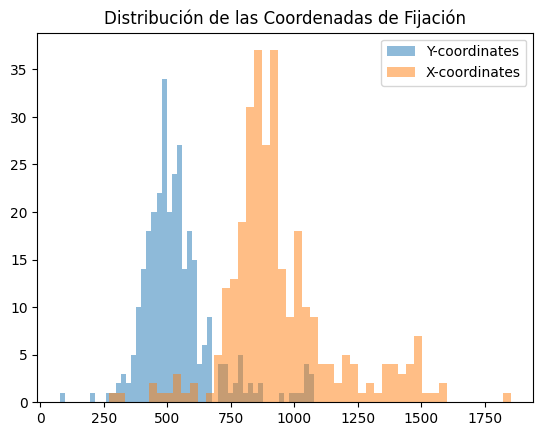

In [5]:
plt.hist(fixation_coords[:, 0], bins=50, alpha=0.5, label='Y-coordinates')
plt.hist(fixation_coords[:, 1], bins=50, alpha=0.5, label='X-coordinates')
plt.legend(loc='upper right')
plt.title('Distribución de las Coordenadas de Fijación')
plt.show()


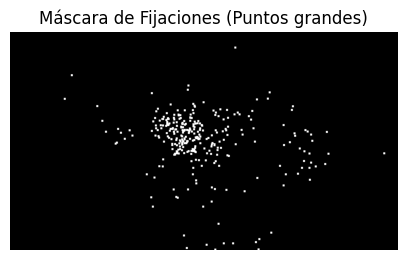

In [6]:
# Aumentamos más el tamaño de los puntos de fijación para que sean más visibles
# En lugar de solo aumentar un rango pequeño, hacemos un área mayor alrededor de cada fijación
fixation_mask = np.zeros((image_height, image_width), dtype=np.float32)

# Aumentamos el rango de píxeles alrededor de cada coordenada de fijación
for coord in fixation_coords:
    y, x = coord[0], coord[1]
    fixation_mask[y-5:y+5, x-5:x+5] = 1  # Aumenta el rango de -5 a +5 píxeles

# Mostramos la máscara de fijaciones con puntos más grandes
plt.figure(figsize=(5, 5))
plt.imshow(fixation_mask, cmap='gray')
plt.title('Máscara de Fijaciones (Puntos grandes)')
plt.axis('off')
plt.show()


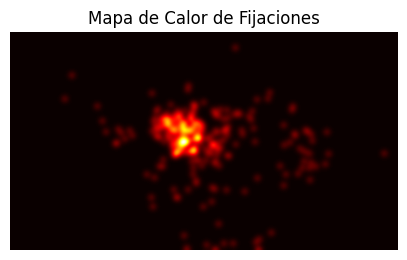

In [7]:
import scipy.ndimage

# Creamos un mapa de calor vacío del tamaño de la imagen
heatmap = np.zeros((image_height, image_width), dtype=np.float32)

# Agregamos las fijaciones al mapa de calor, aumentando el valor en las coordenadas de fijación
for coord in fixation_coords:
    y, x = coord[0], coord[1]
    heatmap[y, x] += 1  # Incrementamos el valor en cada punto de fijación

# Aplicamos una convolución gaussiana para suavizar el mapa de calor (crear un efecto de "difusión")
heatmap = scipy.ndimage.gaussian_filter(heatmap, sigma=15)  # Ajusta sigma para suavizar más o menos

# Normalizamos el mapa de calor para que esté entre 0 y 1
heatmap /= np.max(heatmap)

# Mostramos el mapa de calor
plt.figure(figsize=(5, 5))
plt.imshow(heatmap, cmap='hot')  # Colormap "hot" para representar el calor
plt.title('Mapa de Calor de Fijaciones')
plt.axis('off')
plt.show()


In [8]:
import numpy as np

# Supongamos que ya cargaste la matriz de fijaciones desde el archivo .mat
# Usamos la variable 'fixations' como ejemplo de la matriz cargada

# Obtenemos los valores únicos de la matriz
valores_unicos = np.unique(fixations)

# Imprimimos los valores únicos
print(f"Valores únicos en la matriz: {valores_unicos}")

# Verificamos si la matriz contiene únicamente 0s y 1s
if np.array_equal(valores_unicos, [0, 1]):
    print("La matriz solo contiene 0s y 1s (es binaria).")
else:
    print("La matriz contiene otros valores además de 0s y 1s.")


Valores únicos en la matriz: [0 1]
La matriz solo contiene 0s y 1s (es binaria).


# Load Data

In [9]:
import os
import cv2
import scipy.io

# Ruta de la carpeta principal donde se encuentran las subcarpetas de imágenes
image_main_folder = 'C:/Users/Adrian/Downloads/trainSet/Stimuli/'
mat_main_folder = 'C:/Users/Adrian/Downloads/trainSet/FIXATIONLOCS/'

train_images = []
train_masks = []

# Cargar imágenes
for root, dirs, files in os.walk(image_main_folder):
    dirs[:] = [d for d in dirs if d != 'Output']  # Excluir las carpetas 'Output'
    for filename in files:
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(root, filename)
            image = cv2.imread(image_path)
            train_images.append(image)

# Cargar máscaras
for root, dirs, files in os.walk(mat_main_folder):
    for filename in files:
        if filename.endswith('.mat'):
            mat_path = os.path.join(root, filename)
            mat_data = scipy.io.loadmat(mat_path)
            fixations = mat_data.get('fixLocs')
            fixation_mask = np.zeros(fixations.shape, dtype=np.float32)
            fixation_coords = np.argwhere(fixations == 1)

            # Generar la máscara binaria
            for coord in fixation_coords:
                fixation_mask[coord[0], coord[1]] = 1
            train_masks.append(fixation_mask)

print(f"Cargadas {len(train_images)} imágenes y {len(train_masks)} máscaras.")


Cargadas 2000 imágenes y 2000 máscaras.


In [10]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_images, test_images, train_masks, test_masks = train_test_split(
    train_images, train_masks, test_size=0.2, random_state=42)

print(f"Imágenes de entrenamiento: {len(train_images)}, Imágenes de prueba: {len(test_images)}")


Imágenes de entrenamiento: 1600, Imágenes de prueba: 400


# Model

In [11]:
import torch

# Verificar si PyTorch detecta la GPU
if torch.cuda.is_available():
    print(f"PyTorch está usando la GPU: {torch.cuda.get_device_name(0)}")
else:
    print("PyTorch no detecta ninguna GPU.")


PyTorch está usando la GPU: NVIDIA GeForce RTX 3070


In [12]:
### Prueba 1


from torch.utils.data import Dataset, DataLoader

# Dataset personalizado
class EyeTrackingDataset(Dataset):
    def __init__(self, images, masks):
        self.images = images
        self.masks = masks
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image = torch.Tensor(self.images[idx]).permute(2, 0, 1)  # [channels, height, width]
        mask = torch.Tensor(self.masks[idx]).unsqueeze(0)  # Añadimos el canal [1, height, width]
        
        return image, mask

# Crear los datasets de entrenamiento y prueba
train_dataset = EyeTrackingDataset(train_images, train_masks)
test_dataset = EyeTrackingDataset(test_images, test_masks)


In [13]:
# Cambiar el tamaño del batch a 8 o menos
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


In [14]:
import torch.nn as nn

class EyeTrackingModel(nn.Module):
    def __init__(self):
        super(EyeTrackingModel, self).__init__()
        
        # Definir capas convolucionales
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # Capa 1: 32 filtros
            nn.ReLU(),
            nn.MaxPool2d(2),  # Pooling

            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # Capa 2: 64 filtros
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # Capa 3: 128 filtros
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        # Decodificación para volver a la resolución de la imagen
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=2, stride=2),  # Salida de un canal para las máscaras
            nn.Sigmoid()  # Para salida binaria
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Definir el dispositivo (GPU si está disponible, de lo contrario CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Crear el modelo y moverlo a la GPU
model = EyeTrackingModel().to(device)


In [15]:
import torch.optim as optim

# Definir la función de pérdida y el optimizador
criterion = nn.BCELoss()  # Pérdida de entropía cruzada binaria
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [16]:
import gc
torch.cuda.empty_cache()
gc.collect()  # Esto ayuda a limpiar objetos innecesarios de la memoria


32

In [ ]:
# Ciclo de entrenamiento con DataLoader
epochs = 10

accumulation_steps = 4  # Esto simula un batch 4 veces mayor

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for i, (images, masks) in enumerate(train_loader):
        images, masks = images.to(device), masks.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, masks) / accumulation_steps  # Divide la pérdida por el número de acumulaciones
        loss.backward()

        if (i + 1) % accumulation_steps == 0:  # Después de acumular los gradientes, actualiza los pesos
            optimizer.step()
            optimizer.zero_grad()  # Resetea los gradientes después de cada actualización

        running_loss += loss.item() * accumulation_steps

    print(f"Época {epoch+1}/{epochs}, Pérdida entrenamiento: {running_loss:.4f}")



Época 1/10, Pérdida entrenamiento: 8.3214
